# Analysis of top-1000 movies from 2006 to 2016 according to IMDB.

### Content:
   + Introduction 
   + Data description
   + Researh questions
   + Data preparation: cleaning and shaping
   + Data visualisation and analysis
   + Conclusion
    

### Introduction
IMDB (also known as the Internet Movie Database) is the world's most popular and authoritative source of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, ratings, and fan and critical reviews. The movie and talent pages of IMDb are accessible to all internet users, but a registration process is necessary to contribute information to the site.
As one adjunct to data, the IMDb offers a rating scale that allows users to rate films on a scale of one to ten.
IMDb launched online in 1990 and has been a subsidiary of Amazon.com since 1998.
As of January 2020, IMDb has approximately 6.5 million titles (including episodes) and 10.4 million personalities in its database,as well as 83 million registered users.

The following analysis will provide an overview of the top-1000 movies from 2006 to 2016. It will also provide further insight on the relationships between ranking, revenue, actors, directors, genres and years. 


Sourse: https://en.wikipedia.org/wiki/IMDb and https://help.imdb.com/article/imdb/general-information/what-is-imdb/G836CY29Z4SGNMK5?ref_=help

### Data description
There is data set of 1,000 most popular movies on IMDB for 10 years. 
The data points included are: Rank, Title, Genre, Description, Director, Actors, Year, Runtime, Rating, Votes, Revenue and Metascore.

+ Rank - movie rank order
+ Title - name of the film
+ Genre - genre of the film
+ Description - text about the film
+ Director - name of person, who made the film
+ Actors - names of pople, that played in the film
+ Year - realise year of the film
+ Runtime - the duration of the film in minutes.
+ Rating - the average rating of the film
+ Votes - number of accounts, that have voted for film
+ Revenue - number of profit money of the film
+ Metascore - an aggregated average of critic scores.

It is interesting to know more about relationships of these data points.
These analysis will be based on data of decade(2006-2016).

Sourse: https://www.kaggle.com/PromptCloudHQ/imdb-data

### Research questions
1. Analyse the relationships between revenue and rating of film. 
2. Find which year had the most highly-rated films. 
3. Identify which director makes films with the biggest revenue. 
4. Track relationship between genres and rating of film. Which genre are most often ranked low and which are the highest? 
5. Which actors are often found in high-rated films? 
6. Is there any relationship between films with the most popular actors and the income of the movie?

### Data preparation: cleaning and shaping

First of all, let's take a look at the dataset and identify the main tasks for further cleaning.

In [1]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')
data = pd.read_csv('IMDB-Movie-Data.csv')
data.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


As we can see there are some columns, that are not needed for this analysis.
Namely rank, description, runtime, votes and metascore, so I am going to delete it.

In [2]:
data.drop(['Rank', 'Description', 'Runtime (Minutes)', 'Votes', 'Metascore' ], axis=1, inplace=True)

In [3]:
data.head(5)

,Title,Genre,Director,Actors,Year,Rating,Revenue (Millions)
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,8.1,333.13
1,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,7.0,126.46
2,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,7.3,138.12
3,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,7.2,270.32
4,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,6.2,325.02


Then I want to ensure that data is complete.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1000 non-null   object 
 1   Genre               1000 non-null   object 
 2   Director            1000 non-null   object 
 3   Actors              1000 non-null   object 
 4   Year                1000 non-null   int64  
 5   Rating              1000 non-null   float64
 6   Revenue (Millions)  872 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


With this statistics we can understood, that there are some null values in Revenue (Millions) column. Therefore the next step is find it and delete.

In [5]:
data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               872 non-null    object 
 1   Genre               872 non-null    object 
 2   Director            872 non-null    object 
 3   Actors              872 non-null    object 
 4   Year                872 non-null    int64  
 5   Rating              872 non-null    float64
 6   Revenue (Millions)  872 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.5+ KB


After deleting null rows, I planning to check dataframe for duplication rows.

In [7]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
993    False
994    False
996    False
997    False
999    False
Length: 872, dtype: bool

There are no duplicated rows, so the last step is rename last column for more convenient use.

In [8]:
data = data.rename(columns={"Revenue (Millions)": "Revenue"})

In [9]:
data.head(5)

,Title,Genre,Director,Actors,Year,Rating,Revenue
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,8.1,333.13
1,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,7.0,126.46
2,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,7.3,138.12
3,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,7.2,270.32
4,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,6.2,325.02


There are cleaned dataset without useless columns, duplicated or null rows.

### Data visualisation and analysis

Question 1: Analyse the relationships between revenue and rating of film. 

In [70]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

First of all, I create a new dataframe for this task, due to it would be more comfortable. I need only 4 columns - Rating, Title, Revenue and Year.

In [71]:
data_q1 = data.copy(deep=True)

In [12]:
data_q1.drop(data_q1.columns.difference(['Rating', 'Title', 'Revenue','Year']), 1, inplace=True)

Then I want to know the mean revenue value for each rating over the years.

In [13]:
md_year_rating_revenue = pd.DataFrame(data_q1.groupby(['Year','Rating'])['Revenue'].mean())
md_year_rating_revenue.head()

Revenue
Year Rating            
2006 5.6      38.140000
     5.8     118.680000
     6.0      62.490000
     6.1     200.070000
     6.4      20.026667

In [14]:
md_revenue_pivot = pd.pivot_table(md_year_rating_revenue, values='Revenue', index=['Rating'], columns=['Year'])
md_revenue_pivot.head()

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Rating,,,,,,,,,,,
1.9,NaN,NaN,14.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.7,NaN,NaN,NaN,9.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.73
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.76
4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166.15,NaN


After findeng a mean revenue value I created a table for this dataframe. It is needed for further analysis.

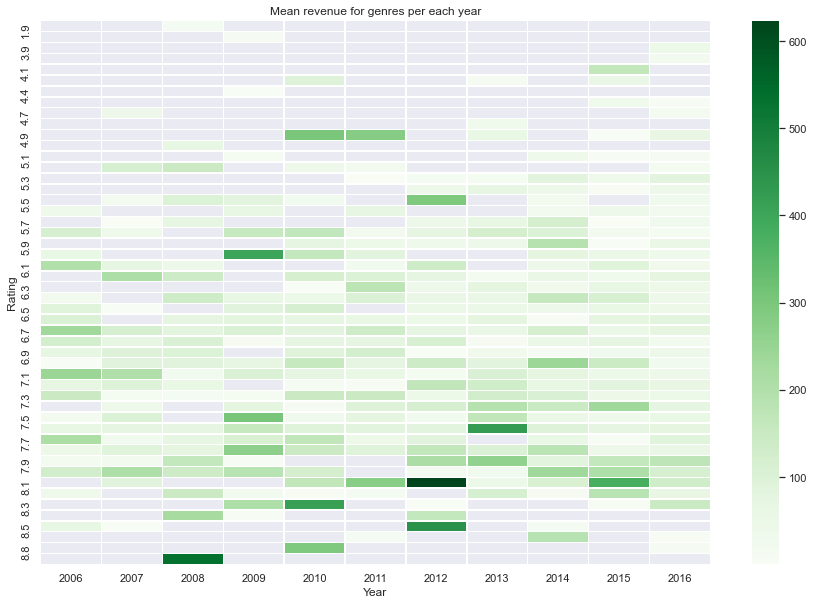

In [15]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(md_revenue_pivot, linewidths=.5, cmap='Greens').set_title("Mean revenue for genres per each year");

Here we can see heatmap diagram. The darker the cell color, the higher the average revenue value of film with particular rating and in particular year. Based on this analysis, we can notice, that in general movies with high ratings tend to have higher revenue.

Question 2: Find which year had the most highly-rated films.

Firstly, let's take a look at diagram below.

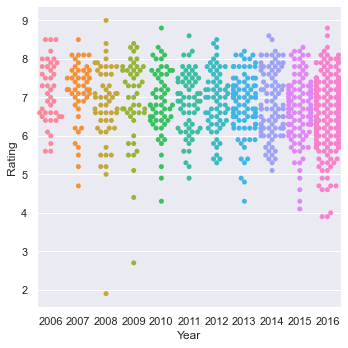

In [16]:
sns.set(rc={'figure.figsize':(26.7,8.27)})
sns.catplot(data=data, kind="swarm",
            x="Year", 
            y="Rating");

With this graphic we can see, that the relationship between year and rating of film is quate stable. And from year to year approximately the same ratio of films by rating. Also you can notice, that over the years people have started to vote more(beacause we see more circles).

In [ ]:
Then I want to see average rating per year.

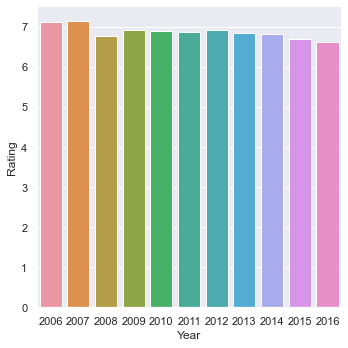

In [17]:
sns.set(rc={'figure.figsize':(26.7,8.27)})
sns.catplot(data=data, kind="bar", 
            x="Year", y="Rating", ci=None);

This bar chart confirms what we found out earlier. The average rating of a film is generally the same every year. Although, it is easy to notice, that 2007 was the year with the highest average rating and 2008 with the lowest.Also we can see, that after a small leap in data in 2009, average ratings of films are decrease year after year.

Question 3: Identify which director makes films with the biggest revenue.

In [48]:
data_q3 = data.copy(deep=True)

In [49]:
data_q3.drop(data_q3.columns.difference(['Revenue', 'Title','Director','Year']), 1, inplace=True)

In [54]:
data_q3 = data_q3.sort_values(["Revenue"], ascending = False) 
#show films with largest revenue
data_q3.head(10)

,Title,Director,Year,Revenue
50,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,2015,936.63
87,Avatar,James Cameron,2009,760.51
85,Jurassic World,Colin Trevorrow,2015,652.18
76,The Avengers,Joss Whedon,2012,623.28
54,The Dark Knight,Christopher Nolan,2008,533.32
12,Rogue One,Gareth Edwards,2016,532.17
119,Finding Dory,Andrew Stanton,2016,486.29
94,Avengers: Age of Ultron,Joss Whedon,2015,458.99
124,The Dark Knight Rises,Christopher Nolan,2012,448.13
578,The Hunger Games: Catching Fire,Francis Lawrence,2013,424.65


In [55]:
data_q3.describe() 
#identify mean of revenue

,Year,Revenue
count,872.000000,872.000000
mean,2012.478211,82.956376
std,3.183552,103.253540
min,2006.000000,0.000000
25%,2010.000000,13.270000
50%,2013.000000,47.985000
75%,2015.000000,113.715000
max,2016.000000,936.630000


In [65]:
biggest_revenue = data_q3[(data_q3['Revenue'] > 113.715000)]
#create new dataframe that would be contain only fims with large revenue (75% according to describe info)

In [68]:
biggest_revenue.info() #have 218 films with biggesr revenue

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 50 to 629
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     218 non-null    object 
 1   Director  218 non-null    object 
 2   Year      218 non-null    int64  
 3   Revenue   218 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 18.5+ KB


Question 4: Track relationship between genres and rating of film. Which genre are most often ranked low and which are the highest? 

First of all create dataframe with the columns, that are needed. Also in Genre column there are several genres, so I will separete them with a comma.

In [30]:
data_q4 = data.copy(deep=True)

In [31]:
data_q4.drop(data_q4.columns.difference(['Rating', 'Title','Genre','Year']), 1, inplace=True)
data_q4.Genre = data_q4.Genre.str.split(',')

There are function that I took from internet. This function make a list of genres and split it to separate rows.
Sourse: https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows

In [32]:
   def explode(data, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = data.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = data[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(data[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(data[col].values) for col in lst_cols}) \
          .loc[:, data.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(data[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(data[col].values) for col in lst_cols}) \
          .append(data.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, data.columns]

In [33]:
data_q4.dropna(inplace = True);
data_q4 = explode(data_q4, ['Genre']);

After finishing some data preparation, let's identify the most popular genre in this dataset.

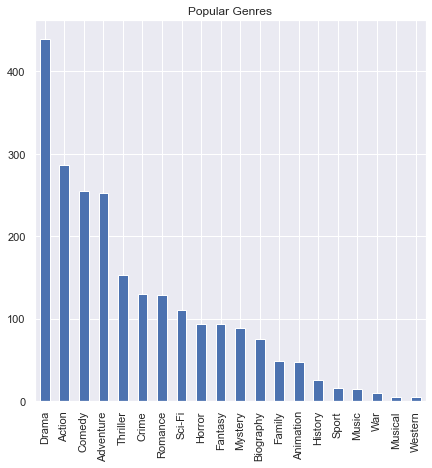

In [41]:
popular_genres = data_q4['Genre'].value_counts()
popular_genres.plot(kind='bar', figsize=(7,7), sort_columns='True', title='Popular Genres');

It is obvious, that the most popular genre is drama. More than 400 movies from this dataset have drama genre. Then I want to know which genre is highly-rated.

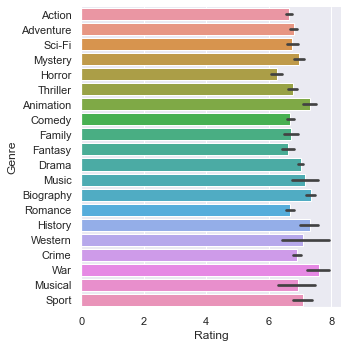

In [42]:
sns.catplot(data=data_q4, kind="bar",
            x="Rating", y = "Genre");

Unexpectedly for me, films with the war genre receive the highes ratings. The less-rated genre is horror according to this bar chart. Then let's see the distribution of genres by years.

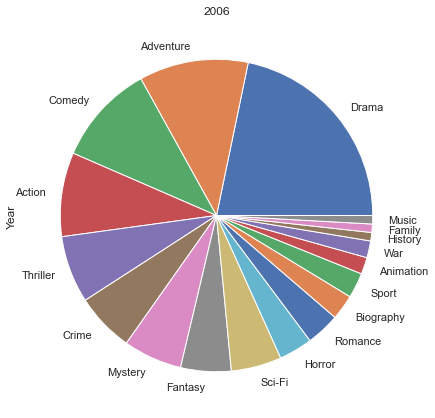

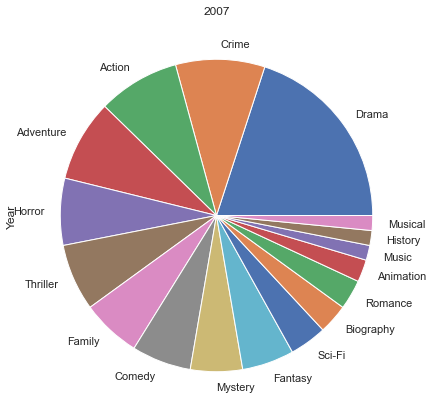

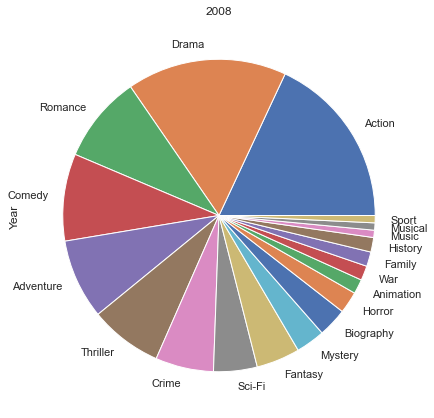

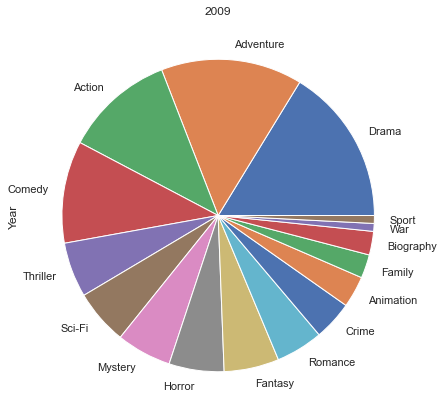

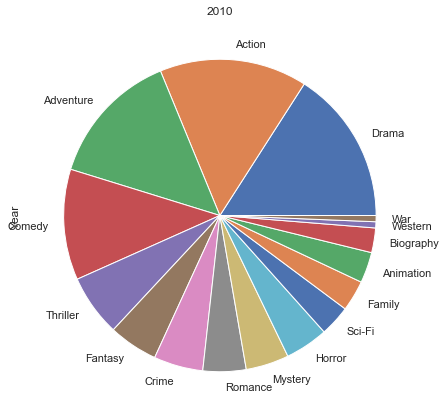

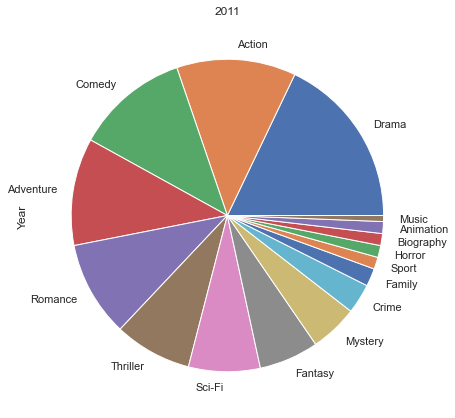

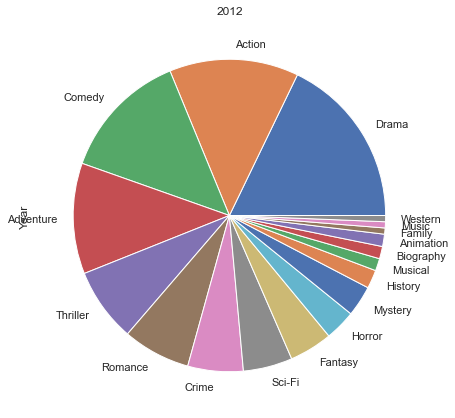

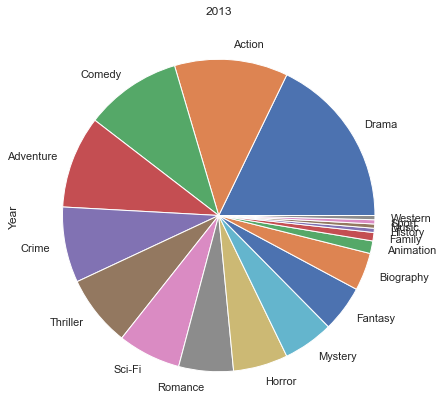

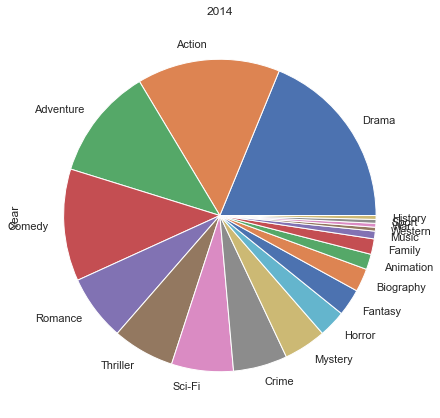

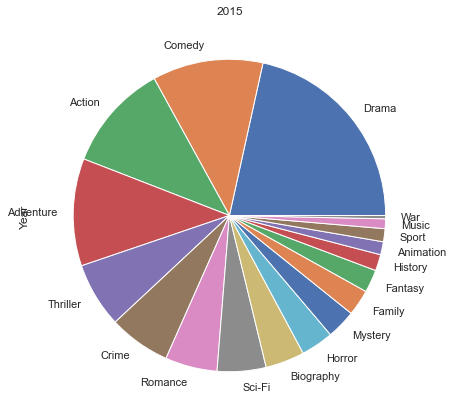

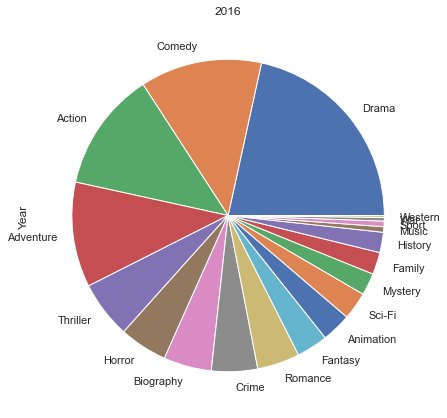

In [46]:
years = data_q4['Year'].unique()
years.sort()

for i in years:
    genre_popularity = data_q4[data_q4['Year'] == i]
    genre_popularity = (genre_popularity.groupby('Genre')['Year'].sum()).sort_values(ascending=False)
    genre_popularity.plot(kind='pie', figsize=(7,9));
    plt.title(i)
    plt.show()

After looking at genre distribution, I am going to find mean value for rating.

In [34]:
md_year_genre_rating = pd.DataFrame(data_q4.groupby(['Year','Genre'])['Rating'].mean())
md_year_genre_rating.head()

Rating
Year Genre              
2006 Action     6.870000
     Adventure  7.069231
     Animation  6.800000
     Biography  7.233333
     Comedy     6.825000

In [37]:
md_rating_pivot = pd.pivot_table(md_year_genre_rating, values='Rating', index=['Genre'], columns=['Year'])
md_rating_pivot.head()

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Genre,,,,,,,,,,,
Action,6.870000,6.772727,6.820833,6.614286,6.829167,6.750000,6.709524,6.766667,6.735135,6.681818,6.355385
Adventure,7.069231,7.063636,6.736364,6.911111,6.940909,6.583333,6.877778,6.804545,6.941379,6.839394,6.575439
Animation,6.800000,7.100000,8.000000,7.725000,7.840000,6.550000,7.500000,7.400000,7.700000,7.000000,7.100000
Biography,7.233333,7.725000,7.300000,7.133333,7.775000,8.100000,7.550000,7.766667,7.483333,7.208333,7.096154
Comedy,6.825000,7.200000,6.091667,6.961538,6.805556,6.752632,6.752381,6.839130,6.637931,6.755882,6.568182


I created a table for mean value of rating for each genre for ten years.

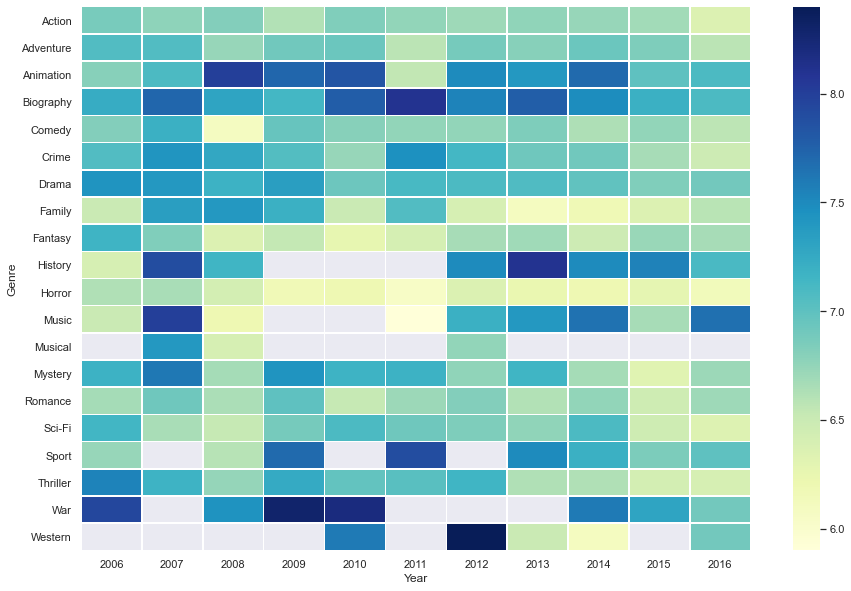

In [38]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(md_rating_pivot, linewidths=.5, cmap='YlGnBu');


In the graph above, we can find the average rating for each genre from 2006 to 2016. The darkest color represents the higher ratings. We can notice, that genre western is not so popular, but not in 2012. Also we see, that after popularity of war in 2009 and 2010 for next 3 years this genre was not popular at all. The less popular genre according to this heatmap is musical.